In [20]:
#Q2 Replicated lecture codes.
#import packages
import random
import matplotlib.pyplot as plt
from numpy.random import normal
import math

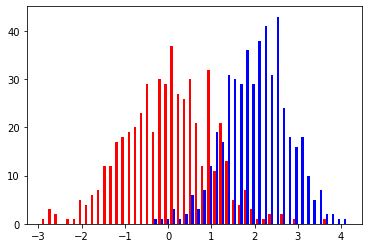

In [31]:
#We need to change the mean and variance for guassian distribution
N = 1000 # sample size
comp_idx = [1,-1]
x_pos, x_neg = [], []
y = []

for i in range(N):
    idx = random.sample(comp_idx,1)[0]
    y.append(idx)
    if idx == 1:
        x_pos.append(normal(0,1))
    elif idx == -1:
        x_neg.append(normal(2/3*math.pi,math.sqrt(0.5)))
    else:
        raise ValueError("Unrecognized idx = {}".format(idx))

plt.hist([x_pos,x_neg], bins=50, color=['r','b'])
plt.savefig("data-gen.png")

In [35]:
#Q2.b
# Compute L_D(f_D)
l_d_pos = 0.5*norm.cdf(1.11208273,2/3*math.pi,math.sqrt(0.5)) 
print(l_d_pos)

l_d_neg = 0.5*(1 - norm.cdf(1.11208273,0,1)) 
print(l_d_neg)

L_d_risk = l_d_pos + l_d_neg
print("L_D(f_D) = {}".format(L_d_risk))

0.04119302498821875
0.06652564534828953
L_D(f_D) = 0.10771867033650828


In [36]:
#Q2.d
# Compute L_D(h)
l_d_pos = 0.5*norm.cdf(1.1125,2/3*math.pi,math.sqrt(0.5)) 
print(l_d_pos)

l_d_neg = 0.5*(1 - norm.cdf(1.1125,0,1)) 
print(l_d_neg)

L_d_risk = l_d_pos + l_d_neg
print("L_D(h) = {}".format(L_d_risk))

0.04123789158779806
0.06648080753895191
L_D(h) = 0.10771869912674997


In [47]:
#Q2.e
x1 = []
for i in range(m):
    x1.append(normal(2/3*math.pi,math.sqrt(0.5)))
y1 = [1]*m

x2 = []
for i in range(m):
    x2.append(normal(0,1))
y2 = [-1]*m

x = x1 + x2
y = y1 + y2

In [48]:
#Code from sample lecture codes
def compute_empirical_risk(x, y, b=0.5):
    error_counts = 0.0

    for (idx,val) in enumerate(x):
        if (val <= b) and (y[idx] > 0):
            error_counts += 1
        elif (val > b) and (y[idx] < 0):
            error_counts += 1
            
    return error_counts/len(x)

def find_thresh(x, y):
    res = {}
    sorted_x = sorted(x)
    for idx in range(len(x)-1):
        b = (x[idx] + x[idx+1])/2
        r = compute_empirical_risk(x, y, b)
        res[b] = r
    sorted_res = sorted(res.items(), key=operator.itemgetter(1))
    print(sorted_res[0])
    return sorted_res[0]

In [54]:
# Compute the emprical risk

b, er = find_thresh(x, y)
#Fit this b to given hypothesis space
i = 400 * b 
print(i)
print(round(i)/400)

(1.3242807631608358, 0.13)
529.7123052643343
1.325


In [55]:
#Q2.f
# Compute L_D(h_s)
l_d_pos = 0.5*norm.cdf(1.325,2/3*math.pi,math.sqrt(0.5)) 
print(l_d_pos)

l_d_neg = 0.5*(1 - norm.cdf(1.325,0,1)) 
print(l_d_neg)

L_d_risk = l_d_pos + l_d_neg
print("L_D(h_s) = {}".format(L_d_risk))

0.06913895608473714
0.046292787828397464
L_D(h_s) = 0.1154317439131346


In [1]:
#Q3

#import data.txt

x1 = []
x2 = []
y = []
with open('data.txt', 'r') as data:
    for line in data.readlines():
        line_ls = line.split("\t")
        x1.append(float(line_ls[0]))
        x2.append(float(line_ls[1]))
        y.append(float(line_ls[2]))
print(x1, x2 ,y)

[0.0, 0.08, 0.25, 0.28, 0.11, -0.08, 0.23, 0.41, 0.47, 0.51, 0.73, 0.7, 0.55, 0.77, 0.99, 0.72, 0.52, 0.33] [0.63, 0.5, 0.36, 0.12, 0.22, 0.19, -0.13, -0.13, 0.14, 0.64, 0.72, 0.52, 0.38, 0.26, 0.24, 0.07, 0.91, 0.85] [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]


In [2]:
#percepton
#Initialize weights w 
w = [0, 0, 0]
count = 0

#I just sat T to a large enough number to iterate until we find the optimal weights
for t in range(10000):
    i = t%len(x1)
    wtxi = x1[i]* w[0] + x2[i] * w[1] + w[2]
    print(wtxi)
    if y[i] * wtxi <= 0 :
        w[0] += y[i] * x1[i]
        w[1] += y[i] * x2[i]
        w[2] += y[i] 
        count = 0
        print("Updating happen here.")
    else:
        count += 1
        print("Correct count now is: " + str(count))
    if count == len(y):#To check whether all data prediction is correct under current weights
        break
    print(w)
print("Final weights is :")
print(w)

0.0
Updating happen here.
[0.0, 0.63, 1.0]
1.315
Correct count now is: 1
[0.0, 0.63, 1.0]
1.2268
Correct count now is: 2
[0.0, 0.63, 1.0]
1.0756000000000001
Correct count now is: 3
[0.0, 0.63, 1.0]
1.1386
Correct count now is: 4
[0.0, 0.63, 1.0]
1.1197
Correct count now is: 5
[0.0, 0.63, 1.0]
0.9181
Correct count now is: 6
[0.0, 0.63, 1.0]
0.9181
Correct count now is: 7
[0.0, 0.63, 1.0]
1.0882
Correct count now is: 8
[0.0, 0.63, 1.0]
1.4032
Updating happen here.
[-0.51, -0.010000000000000009, 0.0]
-0.3795
Correct count now is: 1
[-0.51, -0.010000000000000009, 0.0]
-0.36219999999999997
Correct count now is: 2
[-0.51, -0.010000000000000009, 0.0]
-0.28430000000000005
Correct count now is: 3
[-0.51, -0.010000000000000009, 0.0]
-0.3953
Correct count now is: 4
[-0.51, -0.010000000000000009, 0.0]
-0.5073
Correct count now is: 5
[-0.51, -0.010000000000000009, 0.0]
-0.36789999999999995
Correct count now is: 6
[-0.51, -0.010000000000000009, 0.0]
-0.2743
Correct count now is: 7
[-0.51, -0.0100000